In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [2]:
from sklearn.datasets import load_files

reviews_train=load_files("data/aclImdb/train/")
reviews_test=load_files("data/aclImdb/test/")
text_train,y_train=reviews_train.data, reviews_train.target
text_test,y_test=reviews_test.data, reviews_test.target

print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)) )
print("text_train[1]:\n{}".format(text_train[1]))
text_train=[doc.replace(b",<br />",b" ") for doc in text_train]
text_test=[doc.replace(b",<br />",b" ") for doc in text_test]

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [3]:
text_test=[doc.replace(b",<br />",b" ") for doc in text_test]

In [16]:
print("samples per class (training): {}".format(np.bincount(y_train)))

samples per class (training): [12500 12500]


In [12]:

bards_words=["The fool doth think he is wise,",
 "but the wise man knows himself to be a fool"]

vect=CountVectorizer()
vect.fit(bards_words)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content: {}".format(vect.vocabulary_))

bag_of_words=vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

Vocabulary size: 13
Vocabulary content: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [20]:
print("Dense representation of bag_of_words: \n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words: 
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [5]:
vect=CountVectorizer().fit(text_train)
X_train=vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>


In [23]:
feature_names=vect.get_feature_names()
print("Number of features:{}".format(len(feature_names)))
print("\nFirst 20 features: {}".format(feature_names[:20]))
print("\nfeatures 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("\nEvery 2000th feature:\n{}".format(feature_names[::2000]))

Number of features:74849

First 20 features: ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']

features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']

Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [25]:
scores=cross_val_score(LogisticRegression(),X_train,y_train,cv=5,n_jobs=-1)
print("Mean cross-val accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-val accuracy: 0.88


In [28]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

Best cross-val score: 0.89
Best parameters: {'C': 0.1}


In [30]:
X_test=vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test,y_test)))

0.88


In [31]:
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27272 sparse matrix of type '<class 'numpy.int64'>'
	with 3368680 stored elements in Compressed Sparse Row format>


In [32]:
feature_names=vect.get_feature_names()
print("Number of features:{}".format(len(feature_names)))
print("\nFirst 20 features: {}".format(feature_names[:20]))
print("\nfeatures 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("\nEvery 700th feature:\n{}".format(feature_names[::700]))

Number of features:27272

First 20 features: ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']

features 20010 to 20030:
['repent', 'repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete']

Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butcher', 'cheery', 'commit', 'courtroom', 'deconstruct', 'disgraced', 'dvd', 'escapist', 'felix', 'freeze', 'gorier', 'haunts', 'hungarian', 'insincere', 'juggernaut', 'leer', 'mae', 'messes', 'mushy', 'occasion', 'parker', 'pleasantly', 'pronto', 'recipe', 'reviewing', 'saruman', 'she', 'sneering', 'stefano', 'swashbuckling', 'thrust', 'tvm', 'vampirism', 'westernized']


In [34]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
print("Best cross-val score: {}".format(grid.best_score_))

Best cross-val score: 0.8882


In [36]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['fill', 'hasnt', 'whole', 'seeming', 'herself', 'whence', 'fifty', 'meanwhile', 'after', 'nevertheless', 'elsewhere', 'below', 'such', 'find', 'again', 'next', 'someone', 'please', 'than', 'with', 'call', 'done', 'would', 'describe', 'itself', 'un', 'you', 'hereupon', 'thereafter', 'other', 'former', 'twelve']


In [37]:
vect=CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train=vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26967 sparse matrix of type '<class 'numpy.int64'>'
	with 2164624 stored elements in Compressed Sparse Row format>


In [38]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
print("Best cross-val score: {:.2f}".format(grid.best_score_))

Best cross-val score: 0.88


In [39]:
from sklearn.pipeline import make_pipeline
scores_train=[]
scores_test=[]

for min_df in [1,3,5,7,9,11,13,15,20,30,40,50,70]:
    vect=CountVectorizer(min_df=min_df).fit(text_train)
    X_train=vect.transform(text_train)
    X_test=vect.transform(text_test)
    grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5,n_jobs=-1)
    grid.fit(X_train,y_train)
    scores_train.append(grid.best_score_)
    scores_test.append(grid.score(X_test,y_test))

print("train scores: \n{}".format(scores_train))
print("\ntest scores: \n{}".format(scores_test))

train scores: 
[0.8880800000000001, 0.8881600000000001, 0.8882, 0.8872, 0.8871600000000001, 0.8866399999999999, 0.88628, 0.88628, 0.88512, 0.8828000000000001, 0.8826, 0.88164, 0.8794400000000001]

test scores: 
[0.87908, 0.87864, 0.8784, 0.87828, 0.87812, 0.87812, 0.87776, 0.87708, 0.87736, 0.87668, 0.87704, 0.87704, 0.87636]


In [6]:
pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),
                  LogisticRegression(max_iter=10000))
param_grid={'logisticregression__C': [0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(text_train,y_train)
print("Best cross-val score: {:.2f}".format(grid.best_score_))


Best cross-val score: 0.89


In [8]:
vectorizer=grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train=vectorizer.transform(text_train)

max_value=X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf=max_value.argsort()

feature_names=np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [9]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print("features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'br' 'have' 'one' 'be' 'film' 'are' 'you'
 'all' 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his'
 'out' 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more'
 'when' 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really'
 'story' 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were'
 'other' 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how'
 'great' 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after'
 'any' 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen'
 'its']


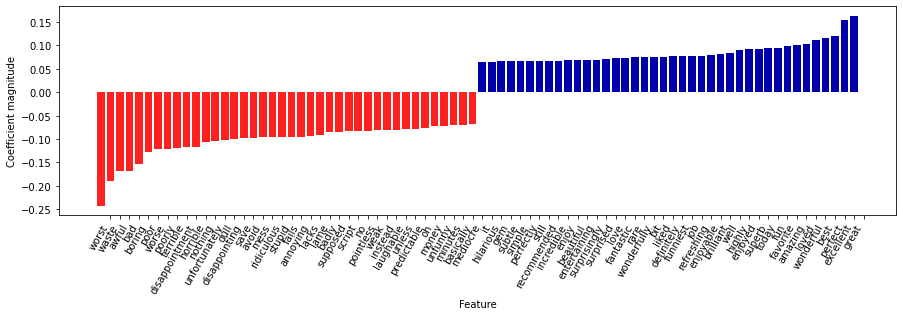

In [10]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
                                    feature_names,n_top_features=40)

In [11]:
max_value[:20]

array([20.15985557, 34.37105041, 16.70816476,  9.18076095, 23.72338583,
       16.58691552, 18.66982327, 28.0047349 , 16.97522755, 16.97522755,
        8.56172175,  8.64176445,  8.92944653, 44.98014071, 56.40507995,
       14.68496294,  9.18076095, 14.46970161, 25.25586271, 18.66982327])

In [13]:
cv=CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


{'the': 9,
 'fool': 3,
 'doth': 2,
 'think': 10,
 'he': 4,
 'is': 6,
 'wise': 12,
 'but': 1,
 'man': 8,
 'knows': 7,
 'himself': 5,
 'to': 11,
 'be': 0}

In [16]:
cv=CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))
print("\nTransformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [18]:
cv=CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [21]:
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=10000,C=100))

param_grid={"tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}

grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(text_train,y_train)
print("Best cross-val score: {:.2f}".format(grid.best_score_))
print("Best params: \n{}".format(grid.best_params_))


Best cross-val score: 0.91
Best params: 
{'tfidfvectorizer__ngram_range': (1, 3)}


In [22]:
scores=grid.cv_results_["mean_test_score"]
scores


array([0.88264, 0.90632, 0.90652])

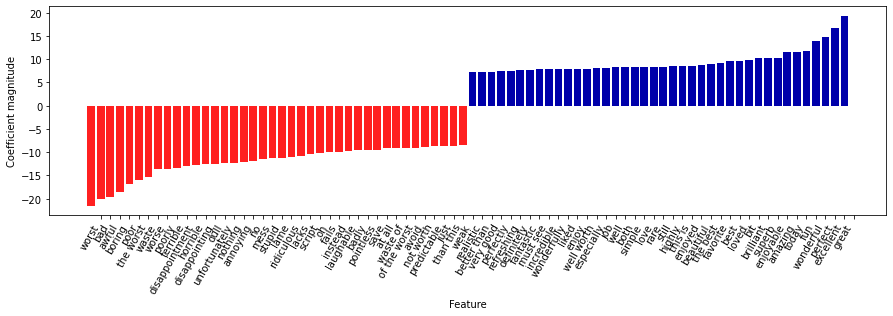

In [23]:
vect=grid.best_estimator_.named_steps["tfidfvectorizer"]
feature_names=np.array(vect.get_feature_names())
coef=grid.best_estimator_.named_steps["logisticregression"].coef_
mglearn.tools.visualize_coefficients(coef,feature_names,n_top_features=40)

In [4]:
import spacy
import nltk
activated=spacy.prefer_gpu()
print("Activated: {}".format(activated))

en_nlp=spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy=en_nlp(doc)
    
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normalization(u"Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow.")

Activated: False
Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [12]:
import re
from sklearn.feature_extraction.text import CountVectorizer
regexp =re.compile('(?u)\\b\\w\\w+\\b')
en_nlp=spacy.load('en_core_web_sm')

def custom_tokenizer(document):
    doc_spacy=en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect=CountVectorizer(tokenizer=custom_tokenizer,min_df=5)

In [13]:
X_train_lemma=lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 23805)
X_train.shape: (25000, 27272)


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid={'C':[0.001,0.01,0.1,1,10]}
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.99,train_size=0.01,random_state=0)
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=cv)
grid.fit(X_train,y_train)
print("Best cross-validation score(Standard CountVectorizer): {:.3f}".format(grid.best_score_))
grid.fit(X_train_lemma,y_train)
print("Best cross-validation score(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score(Standard CountVectorizer): 0.717
Best cross-validation score(lemmatization): 0.713


In [17]:
vect=CountVectorizer(max_features=10000,max_df=.2)
X=vect.fit_transform(text_train)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method="batch",max_iter=25,random_state=0)
document_topics=lda.fit_transform(X)
lda.components_.shape
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,
                           sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
films         show          your          character     action        
such          funny         why           cast          music         
these         series        know          actors        songs         
work          love          ever          role          song          
director      best          did           performance   musical       
character     episode       say           script        best          
world         tv            ve            better        films         
us            comedy        thing         actor         dance         
those         ever          didn          best          scenes        
scenes        shows         something     director      fun           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [19]:
lda100=LatentDirichletAllocation(n_components=100,learning_method="batch",max_iter=25,random_state=0)
document_topics100=lda100.fit_transform(X)
topics=np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting=np.argsort(lda100.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,feature_names=feature_names,
                           sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
jane          why           animation     where         love          richard       earth         
novel         did           cartoon       down          beautiful     blah          van           
sullivan      these         animated      off           heart         korean        animals       
rochester     know          voice         island        life          widmark       human         
version       where         films         gets          wonderful     street        animal        
anne          oh            original      away          world         sunshine      green         
flynn         big           castle        back          beauty        secret        planet        
adaptation    something     version       house         tarzan        fuller        spirit        
eyre      

In [21]:
nature=np.argsort(document_topics100[:,37])[::-1]
for i in nature[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")
print(document_topics100.shape)

b'The first collaboration between Schoedsack & Cooper is a compelling documentary on the migration of the Bakhtiari tribe of Persia. Twice a year, more than 50,000 people and half a million animals cross rivers and mountains to get to pasture.\n'
b'I really enjoyed this movie. The script is fresh and unpredictable and the acting is outstanding.\n'
b'I really enjoyed this movie. The script is fresh and unpredictable and the acting is outstanding.\n'
b'The only other film besides Soylent Green that has such an air of hopelessness is On the Beach. Both films deal with the consequences for the species and the planet from man made cataclysms.\n'
b'I\'ve heard nothing but great things about the 2006 television mini-series, "Planet Earth," narrated by my childhood idol David Attenborough. Nevertheless, whether it was screened down here in Australia or not, I never caught up with it, and when I happened upon the opportunity to see \'Earth (2007)\' \xc2\x96 a feature-length compilation of the s

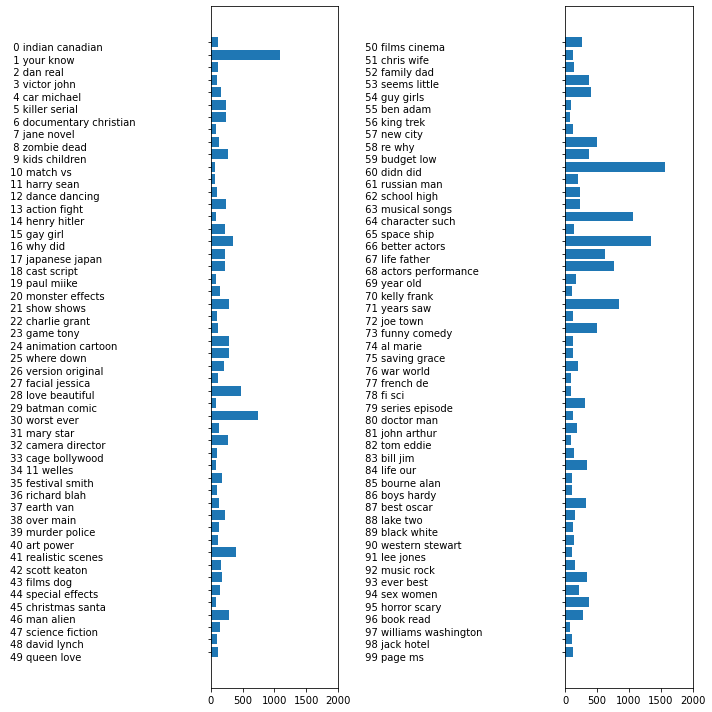

In [26]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
topic_names=[" {:>2} ".format(i)+" ".join(words) 
             for i, words in enumerate(feature_names[sorting[:,:2]])]

for col in [0,1]:
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],ha="left",va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=200)
plt.tight_layout()